terdapat fungsi

f(x,y) = x^3 - cos(y) - 1

g(x,y) = y^2 - sin(x) - 2

so,

df/dx = 3x^2

df/dy = sin(y)

and

dg/dy = -cos(x)

dg/dx = 2y

find x and y with newton-raphson method

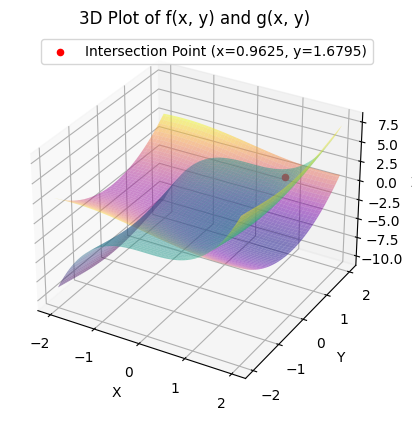

x = 0.9624569592645379
y = 1.6794636672288532


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x, y):
    return x**3 - np.cos(y) - 1
def g(x, y):
    return y**2 - np.sin(x) - 2

def dfdx(x):
    return 3 * (x**2)
def dfdy(y):
    return np.sin(y)

def dgdx(x):
    return -np.cos(x)
def dgdy(y):
    return 2 * y

# Define the initial guess
x0 = 10
y0 = 10

# Define the tolerance
tol = 1e-6

# Write the Newton-Raphson algorithm
def newton_raphson_2d(f, g, dfdx, dfdy, dgdx, dgdy, x0, y0, tol):
    x = x0
    y = y0
    while True:
        # Compute the Jacobian
        J = np.array([[dfdx(x), dfdy(y)], [dgdx(x), dgdy(y)]])
        # Compute the inverse of the Jacobian
        Jinv = np.linalg.inv(J)
        # Compute the function values
        F = np.array([f(x, y), g(x, y)])
        # Compute the correction
        delta = np.dot(Jinv, F)
        # Update the solution
        x = x - delta[0]
        y = y - delta[1]
        # Check for convergence
        if np.sqrt(np.dot(delta, delta)) < tol:
            break
    return x, y

# Call the function
x, y = newton_raphson_2d(f, g, dfdx, dfdy, dgdx, dgdy, x0, y0, tol)

# Create a meshgrid for plotting
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z1 = f(X, Y)
Z2 = g(X, Y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surfaces with labels
surf1 = ax.plot_surface(X, Y, Z1, alpha=0.5, cmap='viridis')
surf2 = ax.plot_surface(X, Y, Z2, alpha=0.5, cmap='plasma')

# Plot the intersection point
ax.scatter(x, y, f(x, y), color='red', label=f'Intersection Point (x={x:.4f}, y={y:.4f})')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot of f(x, y) and g(x, y)')

# Add a legend with labels
ax.legend()

# Show the plot in interactive mode (rotate with cursor)
plt.show()

print("x =", x)
print("y =", y)

try secant method

x = 0.9624573447999066
y = -1.6794627984182966


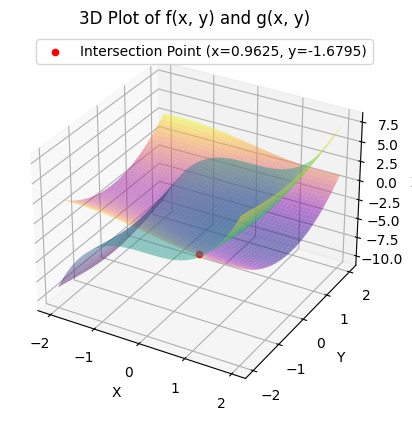

x = 0.9624573447999066
y = -1.6794627984182966


In [4]:
import numpy as np

# Define the functions
def f(x, y):
    return x**3 - np.cos(y) - 1

def g(x, y):
    return y**2 - np.sin(x) - 2

# Define the initial guesses
x0 = -100
y0 = -100
x1 = 0
y1 = 0

# Define the tolerance
tol = 1e-6

# Write the Secant method for 2D systems
def secant_2d(f, g, x0, y0, x1, y1, tol):
    while True:
        # Calculate the function values at the current points
        fx0 = f(x0, y0)
        gx0 = g(x0, y0)
        fx1 = f(x1, y1)
        gx1 = g(x1, y1)

        # Calculate the new estimates
        x2 = x1 - (fx1 * (x1 - x0)) / (fx1 - fx0)
        y2 = y1 - (gx1 * (y1 - y0)) / (gx1 - gx0)

        # Check for convergence
        if np.sqrt((x2 - x1)**2 + (y2 - y1)**2) < tol:
            break

        # Update the points for the next iteration
        x0, y0 = x1, y1
        x1, y1 = x2, y2

    return x2, y2

# Call the function
x, y = secant_2d(f, g, x0, y0, x1, y1, tol)
print("x =", x)
print("y =", y)

# Create a meshgrid for plotting
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z1 = f(X, Y)
Z2 = g(X, Y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surfaces with labels
surf1 = ax.plot_surface(X, Y, Z1, alpha=0.5, cmap='viridis')
surf2 = ax.plot_surface(X, Y, Z2, alpha=0.5, cmap='plasma')

# Plot the intersection point
ax.scatter(x, y, f(x, y), color='red', label=f'Intersection Point (x={x:.4f}, y={y:.4f})')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot of f(x, y) and g(x, y)')

# Add a legend with labels
ax.legend()

# Show the plot in interactive mode (rotate with cursor)
plt.show()

print("x =", x)
print("y =", y)

using simpy

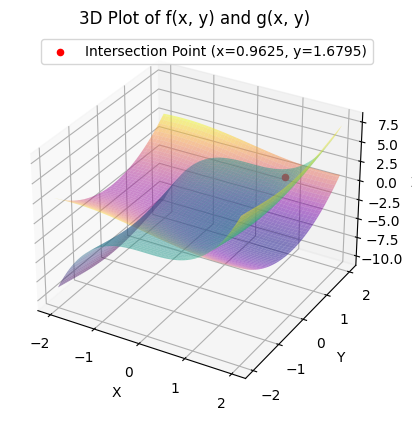

x = 0.9624569592645379
y = 1.6794636672288532


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, lambdify, cos, sin

# Define the function with sympy
x, y = symbols('x y')
f = x**3 - cos(y) - 1
g = y**2 - sin(x) - 2

# Compute the partial derivatives
dfdx = diff(f, x)
dfdy =  diff(f, y)

dgdx = diff(g, x)
dgdy = diff(g, y)

# Convert the functions to Python functions
f = lambdify((x, y), f)
g = lambdify((x, y), g)

dfdx = lambdify((x, y), dfdx)
dfdy = lambdify((x, y), dfdy)

dgdx = lambdify((x, y), dgdx)
dgdy = lambdify((x, y), dgdy)

# Define the initial guess
x0 = 10
y0 = 10

# Define the tolerance
tol = 1e-6

# Write the Newton-Raphson algorithm
def newton_raphson_2d(f, g, dfdx, dfdy, dgdx, dgdy, x0, y0, tol):
    x = x0
    y = y0
    while True:
        # Compute the Jacobian
        J = np.array([[dfdx(x, y), dfdy(x, y)], [dgdx(x, y), dgdy(x, y)]])
        # Compute the inverse of the Jacobian
        Jinv = np.linalg.inv(J)
        # Compute the function values
        F = np.array([f(x, y), g(x, y)])
        # Compute the correction
        delta = np.dot(Jinv, F)
        # Update the solution
        x = x - delta[0]
        y = y - delta[1]
        # Check for convergence
        if np.sqrt(np.dot(delta, delta)) < tol:
            break
    return x, y

# Call the function
x, y = newton_raphson_2d(f, g, dfdx, dfdy, dgdx, dgdy, x0, y0, tol)

# Create a meshgrid for plotting
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z1 = f(X, Y)
Z2 = g(X, Y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surfaces with labels
surf1 = ax.plot_surface(X, Y, Z1, alpha=0.5, cmap='viridis')
surf2 = ax.plot_surface(X, Y, Z2, alpha=0.5, cmap='plasma')

# Plot the intersection point
ax.scatter(x, y, f(x, y), color='red', label=f'Intersection Point (x={x:.4f}, y={y:.4f})')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot of f(x, y) and g(x, y)')

# Add a legend with labels
ax.legend()

# Show the plot in interactive mode (rotate with cursor)
plt.show()

print("x =", x)
print("y =", y)